In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
data.head(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0


### EDA

In [4]:
# Lets check the shape first
data.shape

(1470, 35)

#### There are 1470 rows and 35 columns in the dataset

In [5]:
#Lets now check all the columns and the dtype of each column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
#Lets check for the total number of null values and fill those with best methods

data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
#with the above information we see there are no null values in the entire dataset hence we don't need to fill anything.

In [8]:
#Now lets see with the help of scatter plot the distribution of each column with respect to output which is Attrition

#lets separate the data first into label and features

x = data.drop("Attrition", axis = 1)
y =  data['Attrition']

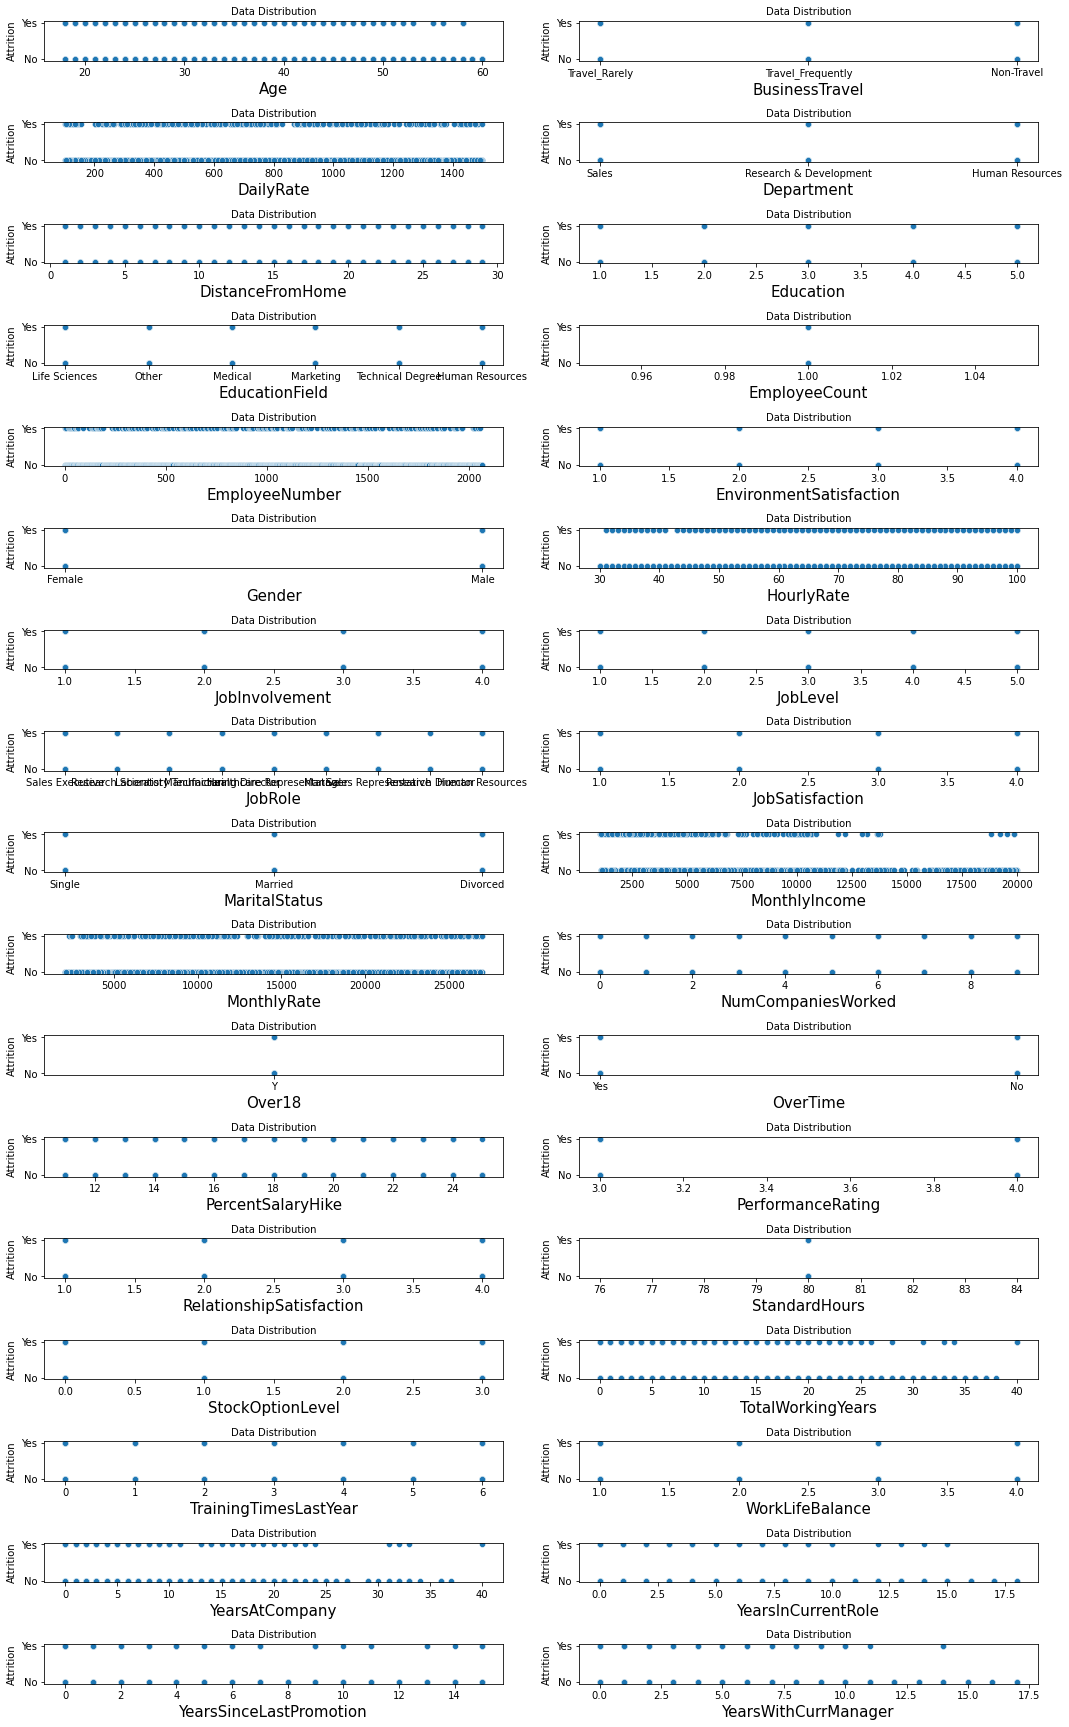

In [9]:
#Lets now plot scatter plot for each column in x with respect to y to understand the data.

plt.figure(figsize = [15,25])
plotnumber = 1

for column in x:
    if plotnumber<=35:
        ax = plt.subplot(18,2,plotnumber)
        sns.scatterplot(x = data[column], y=y)
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

with the above plot lets find out what we observed.

1 -from the age plot =  we see that there are less number of employees getting attrition after they attain the age of 55 otherwise it is equal.

2 - From the daily rate plot =  employe who has daily rate of less than 200 or between 850-860 are getting attrition less.

3 -  From the HourlyRate    = Having hourly rate of between 30 - 32 and 40- 45 are getting less attrition.

4 - From monthly Income Plot = It looks like that people getting income of more than 10000 monthly are staying in the company for longer period than the ones who are getting less than 10000

5 - From total working years plot = It seems employees who have stayed in the organisation for period of more than 25 years are choosing to stay with the company and not getting attrition.

6 - Years in Current Role = Employees who have stayed in the current role for more than 15 years are choosing to stay as compared to current role for less than 15 years.

7 - Years with the Current Manager = Employees who have worked under the same manager for more than 11years are choosing to stay in the same organisation than compared with the ones who have worked less than that.

8 - Columns 1- EmployeeCount, 2- StandardHours, 3 - Over18 have only 0.

In [10]:
# We will go ahead ahead remove the columns of point number 8 of our observation from the dataset.

data.drop(['EmployeeCount','Over18','StandardHours'], axis =1, inplace = True)

In [11]:
#lets see the Standard Deviation, Min Value, 25 % , 75% and maximum value of the colums

data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
#Lets first convert the string values in int for further processing of data with the help of label encoder.

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

data = data.astype('category')# Changing the datatypes into category first

for column in data.columns:
    data[column] = LE.fit_transform(data[column])

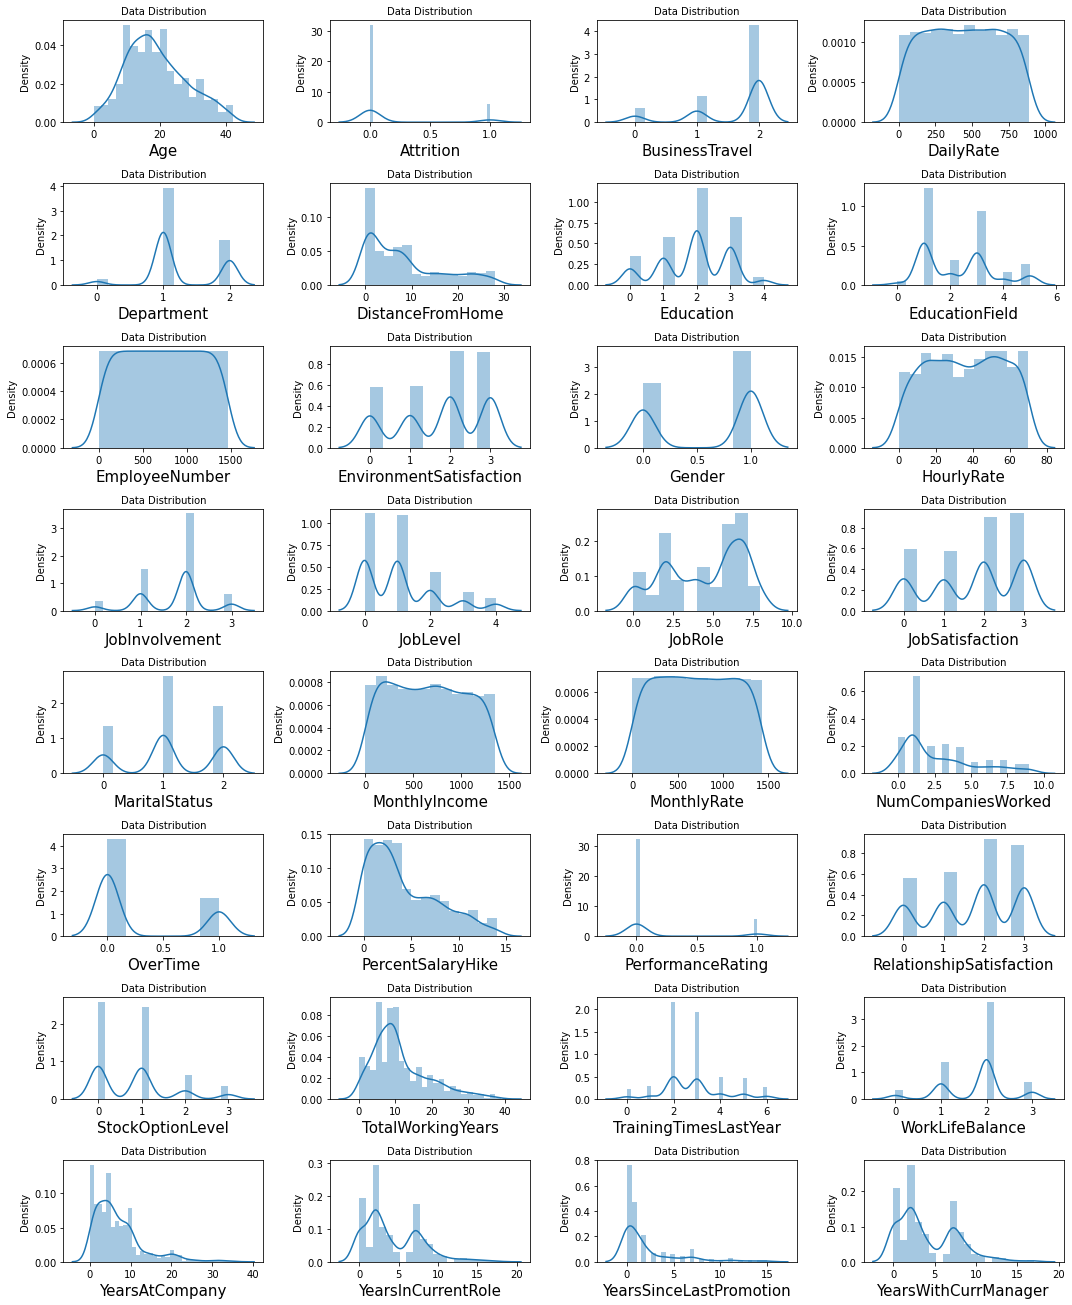

In [63]:
#Checking skewness in the data with the help of distplot

plt.figure(figsize = [15,20])
plotnumber = 1

for column in data:
    if plotnumber<=32:
        ax = plt.subplot(9,4,plotnumber)
        sns.distplot(data[column],)
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

In [14]:
data.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                   0.000930
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.000000
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.060816
MonthlyRate                 0.012315
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.112899
TrainingTimesLastYear       0.553124
W

### With above observation we see skewness in the below columns
1 - DistanceFromHome
2 - JobLevel  - too much skewness        
3 - NumCompaniesWorked  - too much skewness
4 - OverTime           
5 - PerformanceRating  
6 - StockOptionLevel            
7 - Percent Salary Hike
8 - Total Working Years
9 - Years At Company
10 - Years In Current Role
11 - Years Since Last Promotion
12 - Years With Current Manager

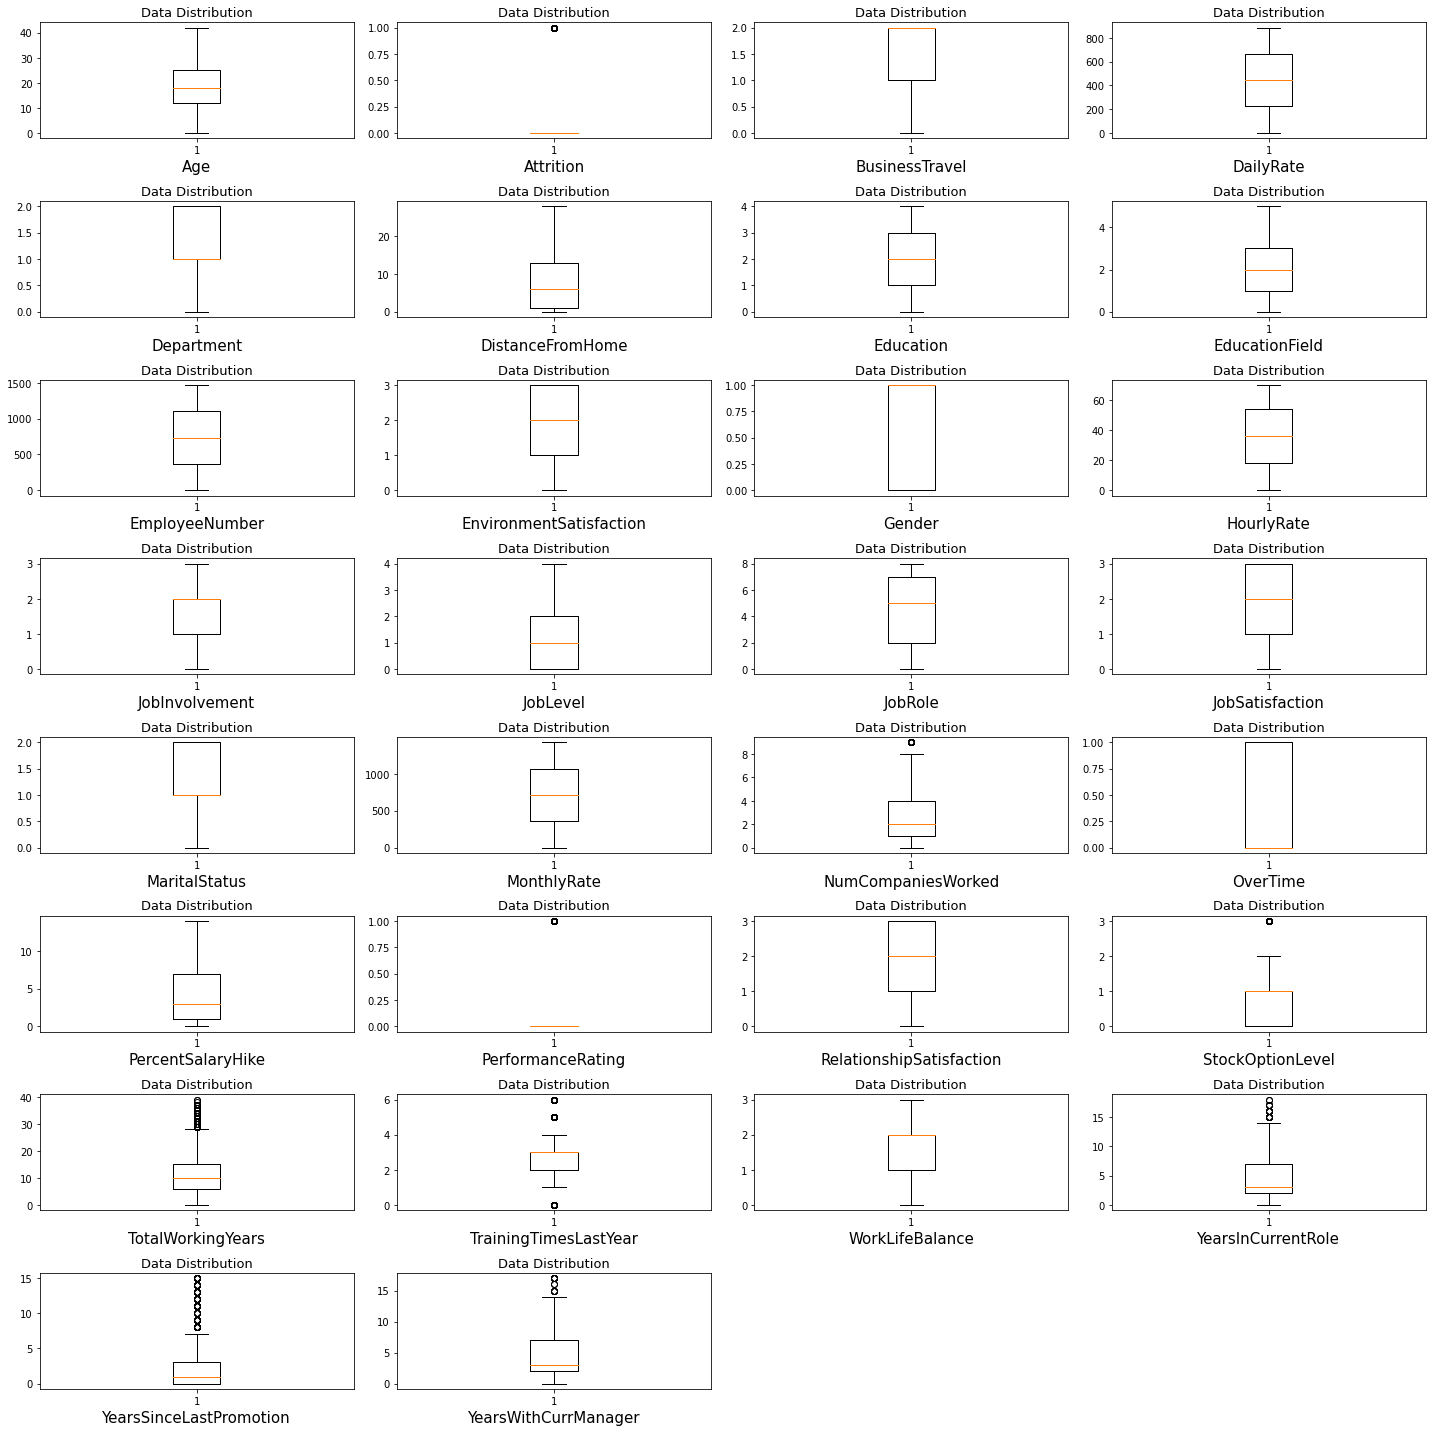

In [38]:
#Checking for outliers

plt.figure(figsize = [20,20])
plotnumber = 1

for column in data:
    if plotnumber<=32:
        ax = plt.subplot(8,4,plotnumber)
        plt.boxplot(data[column])
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 13)
    plotnumber += 1
plt.tight_layout()

With above observation outliers are found in the columns 
1 - NumCompaniesWorked
2 - StockOptionLevel
3 - TotalWorkingYears
4 - TrainingTimesLastYear
5 - YearsAtCompany
6 -YearsinCurrentRole
7 - YearsSinceLastPromotion
8 -YearsWithCurrManager

In [62]:
#Now will check the collinearity among features
corr_mat = data.corr()
corr_mat

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010557,-0.031882,-0.001686,0.208034,-0.040873,-0.010349,0.010146,...,0.001904,0.053535,0.037510,0.680409,-0.019621,-0.021490,0.309796,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056605,0.063991,0.077924,-0.031373,0.026846,-0.010369,-0.103369,...,0.002889,-0.045872,-0.137145,-0.171571,-0.059478,-0.063939,-0.136932,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004103,-0.009044,-0.024469,0.000757,0.023724,-0.015810,0.004174,...,-0.026341,-0.035986,-0.016727,0.034144,0.015240,-0.011256,-0.014720,-0.011497,-0.032591,-0.022636
DailyRate,0.010557,-0.056605,-0.004103,1.000000,0.007796,-0.004738,-0.016550,0.038129,-0.051861,0.018462,...,0.000633,0.008530,0.041786,0.014877,0.002227,-0.037791,-0.032461,0.010997,-0.033431,-0.025849
Department,-0.031882,0.063991,-0.009044,0.007796,1.000000,0.017225,0.007996,0.013720,-0.010365,-0.019395,...,-0.024604,-0.022414,-0.012193,-0.015685,0.036875,0.026383,0.023308,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004738,0.017225,1.000000,0.021042,0.002013,0.032928,-0.016075,...,0.027110,0.006557,0.044872,0.004560,-0.036942,-0.026556,0.009038,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016550,0.007996,0.021042,1.000000,-0.039592,0.041901,-0.027128,...,-0.024539,-0.009118,0.018422,0.148188,-0.025100,0.009819,0.067737,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.038129,0.013720,0.002013,-0.039592,1.000000,-0.002457,0.043163,...,-0.005614,-0.004378,-0.016185,-0.027833,0.049195,0.041191,-0.018987,-0.010506,0.002326,-0.004130
EmployeeNumber,-0.010349,-0.010369,-0.015810,-0.051861,-0.010365,0.032928,0.041901,-0.002457,1.000000,0.017424,...,-0.020675,-0.069654,0.062452,-0.013950,0.023907,0.010740,-0.010528,-0.008853,-0.009151,-0.009432
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018462,-0.019395,-0.016075,-0.027128,0.043163,0.017424,1.000000,...,-0.029548,0.007665,0.003432,-0.002900,-0.019359,0.027627,0.000657,0.018007,0.016194,-0.004999


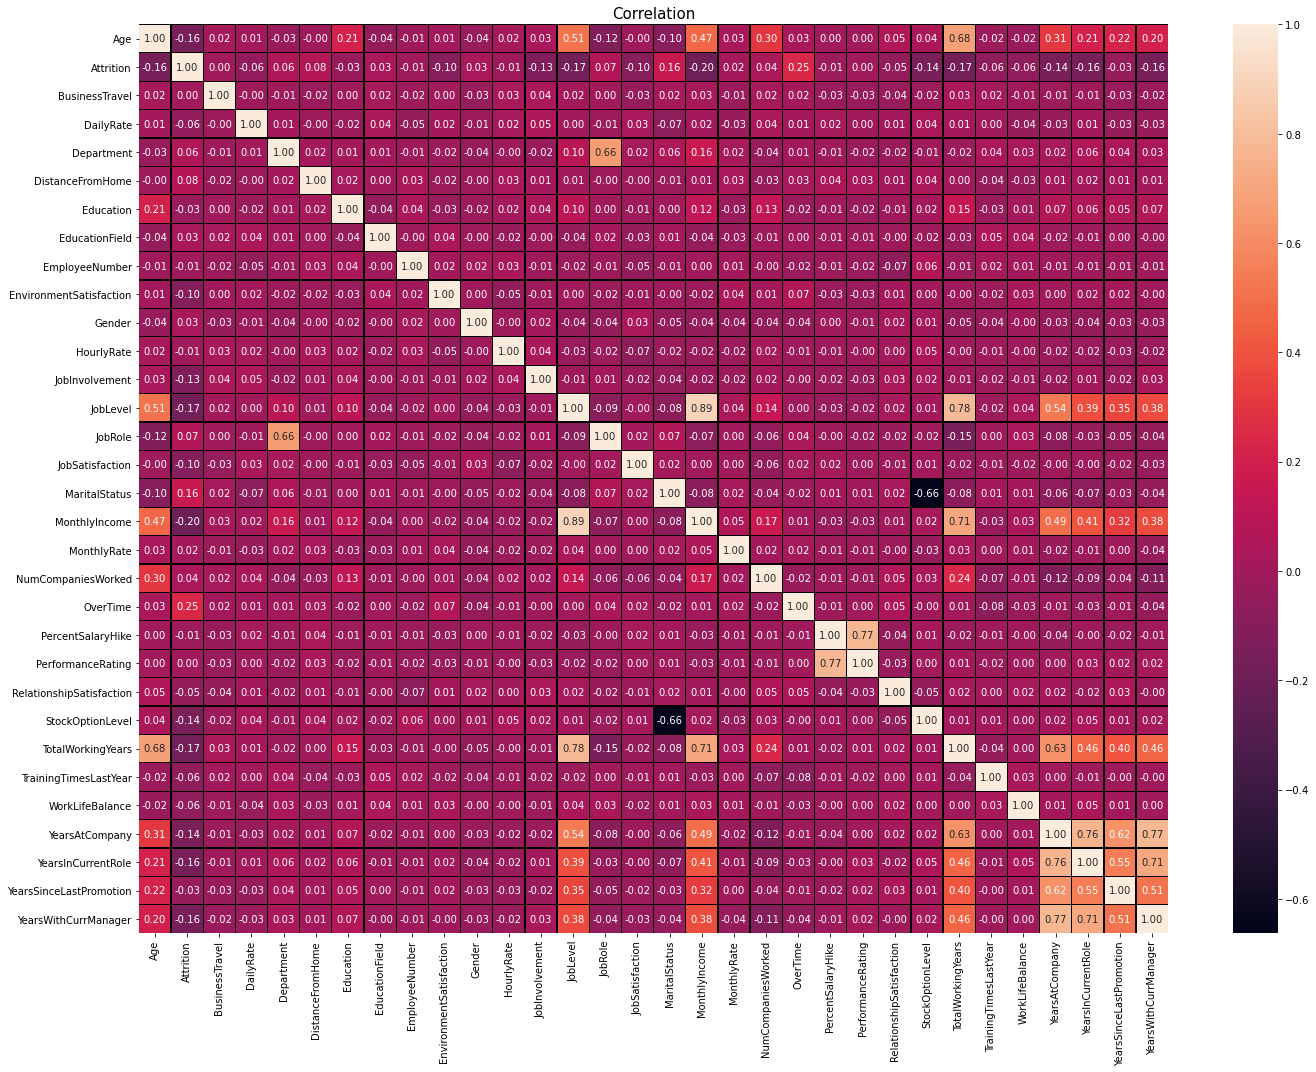

In [64]:
plt.figure(figsize = [20,15])
sns.heatmap(corr_mat,annot=True, linewidths=0.3,linecolor="black",fmt='.2f')
plt.title('Correlation', fontsize=15)
plt.tight_layout()

#### Observation from the above plot.

Max Correlation of the output with the features columns is with Joblevel and MonthlyIncome.

Min Correlation of the output with the features columns is with Overtime, MaritalStatus and JobRole.

**Joblevel** is 89% corellated with monthly Income, 78% correlated with total working years and 54% correlated with YearsAtCompany and it's correlation with the output Attrition is -17%.

**Monthly Income** is 89% corellated with Joblevel, 71% correlated with total working years and 49% correlated with YearsAtCompany and it's correlation with the output Attrition is the least among all features.

**total working years** is 68% corellated with Age, 78% correlated with joblevel and 71% correlated with Monthly Income, 63% correlated with with years at company and it's correlation with the output Attrition is -17%.

**Years at company** is  corelated by 63%, 76%, 62, 77% with Total Working Years, Years in Current Role, Years Since Last Promotion and Years With Curr Manager respectively. and it's corelation with Attrition is -14%.

**Years in Current Role** is  corelated by 76%, 55%, 71% with Years at company, Years Since Last Promotion and Years With Curr Manager respectively.  and it's corelation with Attrition is -16%

**Years Since Last Promotion** is  corelated by 62%, 55%, 51% with Years at company, Years in Current Role and Years With Curr Manager respectively. and it's corelation with Attrition is -3%

**Years With Curr Manager** is  corelated by 77%, 71%, 51% with Years at company, Years in Current Role and Years Since Last Promotion respectively. and it's corelation with Attrition is -16%


### Data Cleaning :

In [13]:
## We will remove the columns 

## 1- JobLevel- as it is too much co-related with MonthlyIncome and other columns too and had too much of skewness in the data.

## 2 - Years at company - as it is highly corelated with too many other features too, had lots of skewness and outliers too.

In [14]:
data.drop(['MonthlyIncome','YearsAtCompany'], axis =1, inplace = True)

**Removing Outliers**

In [15]:
### Now Will remove outliers with the help of Z-score Method.

from scipy import stats

z = np.abs(stats.zscore(data))
print(z)
print('\n Row Numbers ==>', np.where(z>3)[0])
print('\n Column Numbers ==>', np.where(z>3)[1])

[[0.4463504  2.28090588 0.59004834 ... 0.0632959  0.67914568 0.24583399]
 [1.32236521 0.4384223  0.91319439 ... 0.76499762 0.36871529 0.80654148]
 [0.008343   2.28090588 0.59004834 ... 1.16768726 0.67914568 1.15593471]
 ...
 [1.08667552 0.4384223  0.59004834 ... 0.61549158 0.67914568 0.31487349]
 [1.32236521 0.4384223  0.91319439 ... 0.48889978 0.67914568 1.08689522]
 [0.32016256 0.4384223  0.59004834 ... 0.33939374 0.36871529 0.59522723]]

 Row Numbers ==> [  28   45   62   63   64   85   98  110  123  123  123  126  126  153
  178  187  187  190  218  231  231  237  270  281  326  386  386  401
  425  427  445  466  535  561  584  595  595  616  624  635  653  686
  701  716  746  752  799  838  861  875  875  894  914  922  926  926
  937  956  976  976 1008 1024 1043 1078 1078 1086 1093 1116 1138 1156
 1184 1221 1223 1242 1295 1301 1301 1303 1327 1331 1348 1351 1401 1414
 1430]

 Column Numbers ==> [29 28 28 27 28 24 24 28 27 28 29 24 28 29 28 24 29 27 28 27 29 28 24 27
 28 28 29 2

In [16]:
##Storing the zcore > 3 in index

index = np.where(z>3)[0]

#Deleting the indexes having outliers stored in the above variable

New_df = data.drop(data.index[index])

**Removing Skewness**

In [17]:
#Separating label and features

x = New_df.drop(['Attrition'], axis = 1)
y = New_df['Attrition']

In [18]:
#Lets first convert the string values in int for removing of skewness with the help of label encoder.

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

x = x.astype('category')# Changing the datatypes into category first

for column in x.columns:
    x[column] = LE.fit_transform(x[column])

In [20]:
y.head(2)

0    1
1    0
Name: Attrition, dtype: int32

In [21]:
#Importing Power Transform to remove skewness from the entire dataset

from sklearn.preprocessing import power_transform

# Applying it on X to remove the skewness from features.

x = power_transform(x, method='yeo-johnson')

### Model Building:

In [22]:
#Data is now cleaned, skewness and outliers removed. We will now build the model.

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#Scaling the data

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [28]:
#Splitting the data into train and test

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 400, stratify  = y)

In [122]:
#Model Building

In [123]:
## Lets see which model will give the best output

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

In [125]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()
svc = SVC()

In [126]:
#training with the all of them

lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)
svc.fit(x_train,y_train)

print("All Models Trained")

All Models Trained


In [127]:
lr.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
kn.score(x_test,y_test)
svc.score(x_test,y_test)

print("All scores Captured")

All scores Captured


In [128]:
#Lets check the roc_auc_score
#for Logistic Regression
roc_auc_score(y_test,lr.predict(x_test))

0.7198996655518395

In [129]:
#for Decision Tree
roc_auc_score(y_test,dt.predict(x_test))

0.6686176142697882

In [130]:
#for Random Forest
roc_auc_score(y_test,rf.predict(x_test))

0.6282980304719435

In [131]:
#for KNeighborsClassifier
roc_auc_score(y_test,kn.predict(x_test))

0.5937383872166481

In [132]:
#For support vectore classifier
roc_auc_score(y_test,svc.predict(x_test))

0.7022482348569306

In [133]:
#Now plotting roc_auc_curve for all the columns

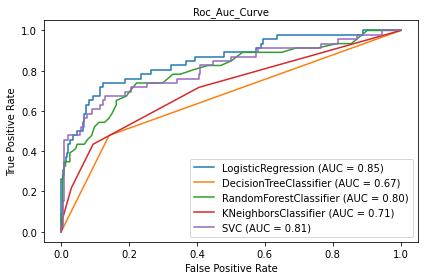

In [134]:
curve = plot_roc_curve(lr,x_test,y_test)

plot_roc_curve(dt,x_test,y_test,ax=curve.ax_)

plot_roc_curve(rf,x_test,y_test,ax=curve.ax_)

plot_roc_curve(kn,x_test,y_test,ax=curve.ax_)

plot_roc_curve(svc,x_test,y_test,ax=curve.ax_)

plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()

With above plotting we can see area covered by Logistic Regression Model is the most hence he will chose it further.

**Getting all the other scores for LinearRegression**

In [135]:
lr.fit(x_train,y_train)

LogisticRegression()

In [136]:
y_pred = lr.predict(x_test)

In [137]:
# For Accuracy Score

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8821428571428571

In [138]:
#For Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[225,   9],
       [ 24,  22]], dtype=int64)

In [139]:
#AUC SCORE
roc_auc_score(y_test,y_pred)

0.7198996655518395

In [140]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       234
           1       0.71      0.48      0.57        46

    accuracy                           0.88       280
   macro avg       0.81      0.72      0.75       280
weighted avg       0.87      0.88      0.87       280



**Cross Validation**

In [141]:
#Doing Cross Validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(lr,x,y,cv=5)

cvs.mean()

0.8704403481822837

Since the accuracy score and cross validation score are almost same we can say that the model is neither overfitting or underfitting

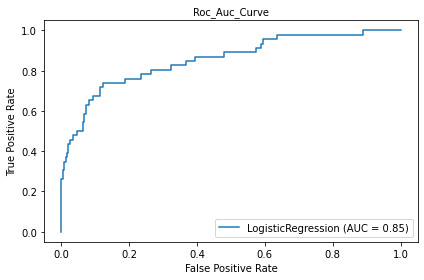

In [142]:
#Plotting ROC_AUC Curve for the model
plot_roc_curve(lr,x_test,y_test)
plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()

### HyperParameter Tuning:

In [143]:
from sklearn.model_selection import GridSearchCV

In [174]:
params = {'C':[4,90,20,15],
         'penalty' : ['l1','l2','elasticnet'],
         'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [175]:
grid = GridSearchCV(lr, param_grid= params, n_jobs=-1)

In [176]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [4, 90, 20, 15],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [177]:
print('Best Estimators == > \n', grid.best_params_)

Best Estimators == > 
 {'C': 4, 'penalty': 'l2', 'solver': 'newton-cg'}


In [178]:
#Reinstantiating classifier with the best parameters

clf = grid.best_estimator_

In [179]:
clf.fit(x_train, y_train)

LogisticRegression(C=4, solver='newton-cg')

In [180]:
y_pred =  clf.predict(x_test)

In [181]:
# For Accuracy Score

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8821428571428571

In [182]:
#For Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[225,   9],
       [ 24,  22]], dtype=int64)

In [183]:
#AUC SCORE
roc_auc_score(y_test,y_pred)

0.7198996655518395

In [184]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       234
           1       0.71      0.48      0.57        46

    accuracy                           0.88       280
   macro avg       0.81      0.72      0.75       280
weighted avg       0.87      0.88      0.87       280



In [185]:
##Cross Validating.

cvs = cross_val_score(clf,x,y,cv=5)

cvs.mean()

0.8704403481822837

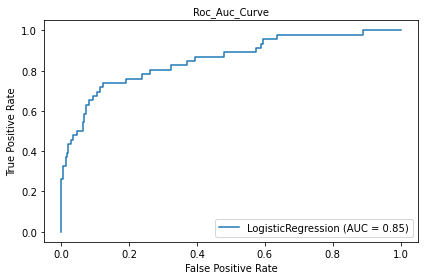

In [186]:
#Plotting ROC_AUC Curve for the model
plot_roc_curve(clf,x_test,y_test)
plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()

### Model Saving :

In [187]:
#Saving the model

import joblib

filename = 'HR_ATTRITION.sav'
joblib.dump(clf, filename)

['HR_ATTRITION.sav']